This project will be taking a look into Fivethirtyeight's NFL Elo score dataset from https://github.com/fivethirtyeight/nfl-elo-game. The primary goal is to train one or two models for this project that will forcast the team scores in each game. The models planned for this project will be the random forest regression model and the gradient boost model. The feature engineering will primarily focus on linking the scores to the games played. Onehot encoding was also explored for the team names, but the team names were found not to have much significance.

Another feature that was planned, but not implemented due to limited time and inexperience was a column that would note the game number in each season. This feature could have been useful as it could have assisted with the association of each team with the game year and time that the game occured.

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error



In [69]:
df = pd.read_csv(r'nfl-elo-game-master/data/nfl_games.csv')

#A good feature to include in this dataset would likely be the difference in score between the two teams, as it could give a very good idea on how far apart the predicted scores should be.
df['score_diff'] = df['score1']-df['score2']
df['score_diff'] = df['score_diff'].abs()

df

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,score_diff
0,1920-09-26,1920,0,0,RII,STP,1503.947000,1300.000000,0.824651,48,0,1.0,48
1,1920-10-03,1920,0,0,AKR,WHE,1503.420000,1300.000000,0.824212,43,0,1.0,43
2,1920-10-03,1920,0,0,RCH,ABU,1503.420000,1300.000000,0.824212,10,0,1.0,10
3,1920-10-03,1920,0,0,DAY,COL,1493.002000,1504.908000,0.575819,14,0,1.0,14
4,1920-10-03,1920,0,0,RII,MUN,1516.108000,1478.004000,0.644171,45,0,1.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16269,2019-01-13,2018,0,1,NE,LAC,1640.171960,1647.624483,0.582068,41,28,1.0,13
16270,2019-01-13,2018,0,1,NO,PHI,1669.105861,1633.114673,0.641378,20,14,1.0,6
16271,2019-01-20,2018,0,1,NO,LAR,1682.450194,1648.424105,0.638772,23,26,0.0,3
16272,2019-01-20,2018,0,1,KC,NE,1675.286412,1661.668566,0.611248,31,37,0.0,6


In [70]:
#df['team1'].unique()
#df['season'] = df['season'].astype(str)
df.dtypes

date           object
season          int64
neutral         int64
playoff         int64
team1          object
team2          object
elo1          float64
elo2          float64
elo_prob1     float64
score1          int64
score2          int64
result1       float64
score_diff      int64
dtype: object

In [71]:
#Game number made in this cell
#date_list = df['date'].unique().tolist()
# season_list = df['season'].unique().tolist()

# for season in season_list:
#     season_check = df['season'].str.contains(season, regex=False)
#     season_rows = df.loc[season_check == True]
#     season_rows = season_rows.reset_index
#     df['game_number'] = 0
#     df['game_number'] = season_rows.index+1

In [72]:
df_noteams = df.drop(['date', 'team1', 'team2'], axis = 1)
df_noteams

,season,neutral,playoff,elo1,elo2,elo_prob1,score1,score2,result1,score_diff
0,1920,0,0,1503.947000,1300.000000,0.824651,48,0,1.0,48
1,1920,0,0,1503.420000,1300.000000,0.824212,43,0,1.0,43
2,1920,0,0,1503.420000,1300.000000,0.824212,10,0,1.0,10
3,1920,0,0,1493.002000,1504.908000,0.575819,14,0,1.0,14
4,1920,0,0,1516.108000,1478.004000,0.644171,45,0,1.0,45
...,...,...,...,...,...,...,...,...,...,...
16269,2018,0,1,1640.171960,1647.624483,0.582068,41,28,1.0,13
16270,2018,0,1,1669.105861,1633.114673,0.641378,20,14,1.0,6
16271,2018,0,1,1682.450194,1648.424105,0.638772,23,26,0.0,3
16272,2018,0,1,1675.286412,1661.668566,0.611248,31,37,0.0,6


In [73]:
#Onehot encoding here
df = pd.get_dummies(df, columns = ['team1'], prefix='team1')
df = pd.get_dummies(df, columns = ['team2'], prefix='team2')

df = df.drop('date', axis = 1)
df

,season,neutral,playoff,elo1,elo2,elo_prob1,score1,score2,result1,score_diff,...,team2_THO,team2_TLM,team2_TOL,team2_TON,team2_TOR,team2_UTI,team2_WBU,team2_WHE,team2_WJA,team2_WSH
0,1920,0,0,1503.947000,1300.000000,0.824651,48,0,1.0,48,...,0,0,0,0,0,0,0,0,0,0
1,1920,0,0,1503.420000,1300.000000,0.824212,43,0,1.0,43,...,0,0,0,0,0,0,0,1,0,0
2,1920,0,0,1503.420000,1300.000000,0.824212,10,0,1.0,10,...,0,0,0,0,0,0,0,0,0,0
3,1920,0,0,1493.002000,1504.908000,0.575819,14,0,1.0,14,...,0,0,0,0,0,0,0,0,0,0
4,1920,0,0,1516.108000,1478.004000,0.644171,45,0,1.0,45,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16269,2018,0,1,1640.171960,1647.624483,0.582068,41,28,1.0,13,...,0,0,0,0,0,0,0,0,0,0
16270,2018,0,1,1669.105861,1633.114673,0.641378,20,14,1.0,6,...,0,0,0,0,0,0,0,0,0,0
16271,2018,0,1,1682.450194,1648.424105,0.638772,23,26,0.0,3,...,0,0,0,0,0,0,0,0,0,0
16272,2018,0,1,1675.286412,1661.668566,0.611248,31,37,0.0,6,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Train random forest here. I used n_estimators=100 since its the default value
Forest = RandomForestRegressor(n_estimators=100)
x = df.drop(['score1', 'score2'], axis = 1)
y = df[['score1', 'score2']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

Forest.fit(x_train, y_train)

RandomForestRegressor()

In [75]:
y_prediction = Forest.predict(x_test)
y_prediction

array([[13.46, 24.  ],
       [13.91, 23.79],
       [26.34, 12.04],
       ...,
       [11.45, 40.07],
       [19.53, 21.5 ],
       [16.19, 23.87]])

For the analysis of the regression model, I wanted to find the root mean-square error and the r2 value. the rmse would give me an idea of how far off each of the numbers were on average, and r2 would allow me to see an overall picture of the fit of this model with the test data. Feature importances was also used in order to look at the effects of each feature on the outcome of the model predictions.

the rmse is:
7.123339129847079
the r2 value is:
0.582098736788313


<BarContainer object of 217 artists>

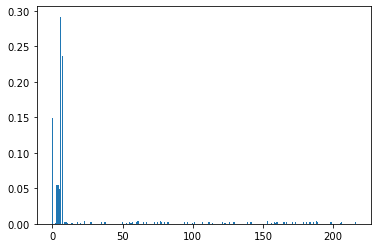

In [76]:
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
print('the rmse is:')
print(rmse)
r2 = r2_score(y_test, y_prediction)
print('the r2 value is:')
print(r2)

importance = Forest.feature_importances_
plt.bar([x for x in range(len(importance))], importance)

In this first attempt, there appears to be significant weighting on the earlier features of the dataset, indicating that the onehot encoded team names did not seem to be largely useful. In the next test of the random forest model, I will use the earlier version of the dataset that I made without team names. 

In [77]:
x2 = df_noteams.drop(['score1', 'score2'], axis = 1)
y2 = df_noteams[['score1', 'score2']]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.25)
Forest.fit(x2_train, y2_train)

RandomForestRegressor()

In [78]:
y2_prediction = Forest.predict(x2_test)
y2_prediction

array([[14.88, 25.08],
       [20.11, 22.87],
       [18.43, 15.92],
       ...,
       [31.88, 13.58],
       [19.37, 24.88],
       [10.68, 32.55]])

the rmse is:
7.286263992695161
the r2 value is:
0.5642838145778164


<BarContainer object of 8 artists>

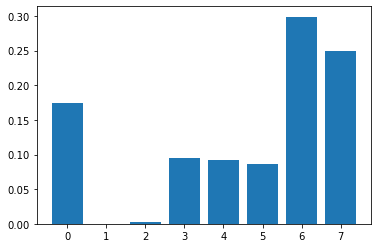

In [79]:
mse = mean_squared_error(y2_test, y2_prediction)
rmse = np.sqrt(mse)
print('the rmse is:')
print(rmse)
r2 = r2_score(y2_test, y2_prediction)
print('the r2 value is:')
print(r2)

importance = Forest.feature_importances_
plt.bar([x for x in range(len(importance))], importance)

Overall, the accuracy of the random forest model was low. I believe that this is due in part to the lower amount of feature engineering that I employed with this project, as there were certain features that I could not figure out how to implement (such as the game number). If more prominently useful engineered features were included in this dataset, then the accuracy of the random forest would surely increase. 

From the feature importance graphs, it seems as though year (feature 0), result (feature 6) and score difference (feature 7) all play a relatively large role in the teamless dataset.

The next model that I wanted to run was the Gradient Boosted Regressor (GBR) due to its high accuracy and similarity to the random forest model. In this attempt, I wanted to use the dataset with no teams, as the lower number of features would have surely cut down on computational time. 

In [80]:
#Train Gradient boosted regressor here
#With the GBR, I needed to train two separate models in order to get each score, so for both models I will use the dataset without team names, as it will likely be less computationally expensive
x1 = df_noteams.drop(['score1', 'score2'], axis = 1)
y1 = df_noteams['score1']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.25)

grad = GradientBoostingRegressor()
grad.fit(x1_train, y1_train)

GradientBoostingRegressor()

In [81]:
y1_prediction = grad.predict(x1_test)
y1_prediction

array([24.94401087, 11.35762095, 23.50957745, ..., 10.3014384 ,
       17.19983187, 26.77085722])

the rmse is:
6.868557728600411
the r2 value is:
0.6345984997683696


<BarContainer object of 8 artists>

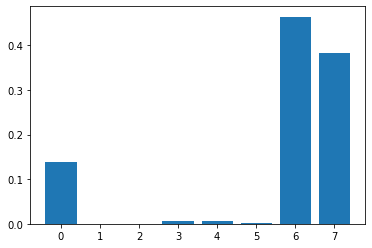

In [82]:
mse = mean_squared_error(y1_test, y1_prediction)
rmse = np.sqrt(mse)
print('the rmse is:')
print(rmse)
r2 = r2_score(y1_test, y1_prediction)
print('the r2 value is:')
print(r2)

importance = grad.feature_importances_
plt.bar([x for x in range(len(importance))], importance)

In [83]:
x2 = df_noteams.drop(['score1', 'score2'], axis = 1)
y2 = df_noteams['score2']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.25)

grad = GradientBoostingRegressor()
grad.fit(x2_train, y2_train)

GradientBoostingRegressor()

In [84]:
y2_prediction = grad.predict(x2_test)
y2_prediction

array([13.8784106 , 19.21730962, 10.38115361, ..., 22.54994567,
       12.9409601 , 23.26129587])

the rmse is:
6.975880260769422
the r2 value is:
0.5848223424753853


<BarContainer object of 8 artists>

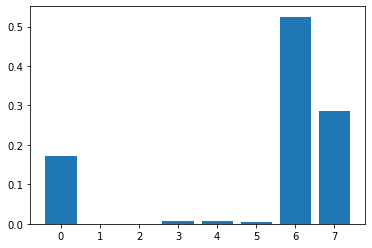

In [85]:
mse = mean_squared_error(y2_test, y2_prediction)
rmse = np.sqrt(mse)
print('the rmse is:')
print(rmse)
r2 = r2_score(y2_test, y2_prediction)
print('the r2 value is:')
print(r2)

importance = grad.feature_importances_
plt.bar([x for x in range(len(importance))], importance)

Overall, the gradient boost regressor model seems to be a bit more accurate in terms of the lower rmse and the higher r2 value. However, the model is still relatively inaccurate, as the rmse is relatively high. As said previously after the random forest runs, more engineered features that associate the scores with the other presented values (such as the elo score) would have likely provided more accuracy. As mentioned previously in the random forest conclusion, the season (feature 0),result (feature 6) and score difference (feature 7) all seem to more heavily relate to the final prediction than the elo scores or winning chance features.